In [1]:
import utils
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('shot_logs.csv')

In [3]:
# Choose the features
features = [
    "SHOT_NUMBER",
    "PERIOD",
#     "GAME_CLOCK",
    "SHOT_CLOCK",
    "DRIBBLES",
    "TOUCH_TIME",
    "SHOT_DIST",
    "PTS_TYPE",
    "CLOSE_DEF_DIST",
#     "FGM",  # cant have this because it is knowledge from after the shot (indicates result)
]

non_scaled_features = [
#     "PTS_TYPE"
]

advanced_features = [
    "LOCATION",
    "GAME_ID",
    "MATCHUP",
    "player_id",
    "CLOSEST_DEFENDER_PLAYER_ID",
]
target = ['PTS']

In [4]:
# Run normalization functions
df['SHOT_CLOCK'] = utils.normalize_shotclock(df['SHOT_CLOCK'])
df['LOCATION'] = utils.normalize_location(df['LOCATION'])
df['PTS'] = np.float64(df['PTS'])
features.remove("PTS_TYPE")
df = utils.rescale_features(features, df, non_scaled_features)
features.append("PTS_TYPE")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=42)

In [6]:
model = AdaBoostClassifier()

In [7]:
y = y_train.values.ravel()

In [8]:
model.fit(X_train, y)
actual = model.score(X_test, y_test)
print actual

0.546348928728


In [9]:
results = []
for i in range(100):
    np.random.shuffle(y)
    model.fit(X_train, y)
    result = model.score(X_test, y_test)
    results.append(result)

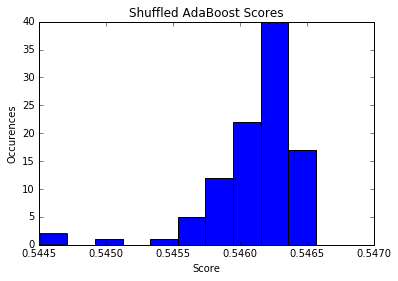

In [10]:
plt.hist(results)
plt.title('Shuffled AdaBoost Scores')
plt.xlabel('Score')
plt.ylabel('Occurences')